## <center><font color = "navy">Research on Audit fee determinants using Data Management <br>and Regression Analysis</font></center> 
<b>Author: Khizar Tahir</b>

## A. Introduction

While estimating relationship between two or more variables, we categorize them as independent and dependent variables. As the names suggest, the dependent variable, also known as Response variable, changes its value based on the value of the independent or Predictor variables. We tend to denote the response variable by *Y* and place it on the Left-hand side of the equation to be explained by predictor variables denoted by *X* placed on the Right-hand side of the equation. 

The practice of linking the *Y* variable with *X* is called Fitting a model. There are multiple ways of doing it. The simplest is called Linear Regression Model between two variables expressed as a line equation *Y = a + bX* where *a* represents the y-intercept of the straight line, and *b* represents the slope of the line signifying the **coefficient** of *X*. With multiple *X* variables impacting the response variable, the equation takes the form: 

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2...\beta_n X_n$$ 

where *n* is the number of independent variables. 

An important part of fitting a regression model is defining what our *Y* and *X* variables are going to be. The response variable is often easier to identify since that is what we want to study. But finalizing the *X* variables, how many are they, do we need to normalize them, scale them, or take logarithms are all vital questions. The process of defining these curated *X* variables to be used as Metrics is called **Feature Engineering**. 

Once the *X* variables are defined, **Ordinary Least Squares** Regression can be run. The resulting **R-squared** value shows how well the model fit the data - how much of the variability in *Y* could be explained by our model. 

## B. Project Scope

In this project, we have been given two datasets:
<ol>
    <li>From the Audit analytics database, we have a dataset containing information about audits conducted for public firms like Tesla. This contains our variable of interest: Audit Fee charged per firm for a given year. </li>
    <li>A dataset containing information about the financial characteristics of firms, like size of firm, number of employes, earnings, etc. </li>
</ol>

Our goal is to identify relationship between Audit fees (Y variable) and financial characteristics of firms (X variables). We will use OLS to fit a model on the given data. Before we run any regression, we need to do the feature engineering for our model. This will be done in two methods:
<ol>
    <li>Through <b>Exploratory Data Analysis</b> that leverages Descriptive Statistics, visualizations, and Pandas functions.</li>
    <li>Through <b>Library research </b> on Audit Fee/Pricing models and then using Business knowledge and Judgement.</li>
</ol>

After defining the features, we will run the regression, and see how well the model fits, and possibly improve the results. 

## C. Code

### 0. Preliminary work - importing packages

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.formula.api as sm, math
from datetime import datetime

### 1. File reading, merging dataframes, and Data cleaning. 
Here, we will read in the two datasets, rename anchor columns, merge them on the basis of firm Tickers AND fiscal year. Then, we drop all rows with missing values and do a small check for missing values.
We also add a new column 'newdate' with FISCAL_YEAR_ENDED date as datetime variable for filtering later. 

In [2]:
myPath = "C:/RIT Courses/BANA 680 - Data Mgmt for BA/Ass 4/"
fee = pd.read_csv(myPath + "BANA-680 Assignment 4 OL AuditFees201019.csv", encoding = "ISO-8859-1")
fee = fee.rename(columns = {'BEST_EDGAR_TICKER':'tic', 'FISCAL_YEAR':'fyear'})
firms = pd.read_csv(myPath + "BANA-680 Assignment 4 OL Compustat201019.csv")
df = pd.merge(fee, firms, on = ['tic', 'fyear'])
df.dropna(inplace = True)
print(df.isnull().values.any())

False


In [3]:
df['newdate'] = pd.to_datetime(df['FISCAL_YEAR_ENDED'])
df.head(2)

,fyear,FISCAL_YEAR_ENDED,AUDIT_FEES,AUDITOR_NAME,COMPANY_FKEY,tic,gvkey,datadate,indfmt,consol,...,ebit,ebitda,emp,invt,lct,pifo,exchg,costat,fic,newdate
4,2014,31-May-14,1794370,KPMG LLP,1750,AIR,1004,20150531,INDL,C,...,-8.6,83.7,4.85,566.7,412.0,11.2,11.0,A,USA,2014-05-31
5,2015,31-May-15,1914370,KPMG LLP,1750,AIR,1004,20160531,INDL,C,...,66.1,136.9,4.70,563.7,329.0,13.2,11.0,A,USA,2015-05-31


## Exploratory Data Analysis

### 2. Basic summary of data. 
We take a quick look of the types of variables we have and some descriptive statistics of our dataframe. 

**Unique data types:**

In [4]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('<M8[ns]')],
      dtype=object)

In [5]:
df.describe()

,fyear,AUDIT_FEES,COMPANY_FKEY,gvkey,datadate,act,at,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg
count,14097.000000,1.409700e+04,1.409700e+04,14097.000000,1.409700e+04,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000
mean,2014.446336,3.175193e+06,9.285593e+05,69679.461517,2.014665e+07,2553.708796,7460.978164,2768.484654,675.955615,978.583900,17.249862,519.257544,1748.546275,307.909065,12.913599
std,2.558782,5.070640e+06,4.989844e+05,71239.677601,2.570692e+04,8941.474437,26388.258592,10852.588535,2788.909679,3760.679806,72.028447,2098.146121,7052.401648,1957.059816,2.041336
min,2010.000000,0.000000e+00,1.750000e+03,1004.000000,2.010063e+07,0.000000,0.000000,-11591.210000,-25913.000000,-21913.000000,0.000000,0.000000,0.000000,-19830.000000,11.000000
25%,2012.000000,6.340000e+05,7.492510e+05,11259.000000,2.012123e+07,115.598000,209.461000,83.223000,-0.136000,6.467000,0.524000,0.487000,40.330000,-0.041000,11.000000
50%,2015.000000,1.569000e+06,1.021860e+06,28742.000000,2.015123e+07,438.422000,1040.447000,404.506000,68.594000,113.759000,2.764000,44.877000,197.175000,7.100000,14.000000
75%,2017.000000,3.425000e+06,1.333141e+06,141178.000000,2.017123e+07,1492.000000,4188.800000,1473.737000,361.431000,522.000000,10.395000,311.207000,791.000000,90.737000,14.000000
max,2019.000000,6.570000e+07,1.768224e+06,328795.000000,2.019073e+07,170929.000000,531864.000000,191794.000000,71230.000000,81730.000000,2300.000000,62567.000000,167579.000000,67504.000000,21.000000


### 3. Check out distribution of variable of interest - Audit fee

count    1.409700e+04
mean     3.175193e+06
std      5.070640e+06
min      0.000000e+00
25%      6.340000e+05
50%      1.569000e+06
75%      3.425000e+06
max      6.570000e+07
Name: AUDIT_FEES, dtype: float64


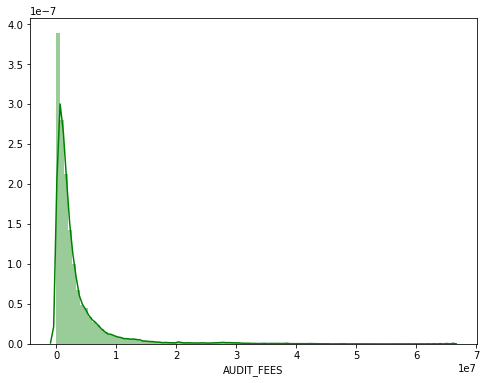

In [6]:
import warnings
warnings.filterwarnings('ignore')
print(df['AUDIT_FEES'].describe())
plt.figure(figsize=(8, 6))
sns.distplot(df['AUDIT_FEES'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

**Observations:** Fee ranges from 0 till a huge amount. Distribution is right skewed

### 4. Numerical data analysis
We isolate the numerical variables to understand them deeper since they are likely to drive the regression model and are required for calculating further variables.  

#### Creating new variables based on research

Before we do any visualizations to identify patterns, we want to make sure we have all the relevant variables in our dataframe. 
Based on the research (see References at the end), we will include the following variables:
<ul>
    <i>Numerical variables:</i>
    <li><b>Natural log of Audit fees:</b> We learn from the empirical model that taking natural log for fee fits the model better as it manages extreme values. </li>
    <li><b>Natural log of firm size/Total assets: </b> Natural log of size measured as total assets of a company is known metric used for audit fee determination. </li>
    <li><b>Ratio of Inventory to Assets:</b> serves as the Inherent Risk factor.</li>
    <i>Indicator/Dummy variables:</i>
    <li><b>Big4:</b> Is the audit firm a big 4 firm. 1 if yes, otherwise 0. This is known to have an effect. </li>
    <li><b> Busy</b> Is the audit being conducted in an auditor's busy period. 1 if yes, otherwise 0. Another potential factor. </li>
    <li><b>Frgn:</b> Indicator variable equal to 1 if pifo is not 0, otherwise 0. </li>
    <li><b>Loss:</b> Indicator variable equal to 1 if ebitda (used in place of net income as per Investopiedia) is negative.</li>

In [7]:
big4 = ['KPMG LLP', 'Deloitte & Touche LLP', 'Ernst & Young LLP', 'PricewaterhouseCoopers LLP']
# ln Audit_fees
df['lnAudit_fees'] = [np.log(x).astype(int) for x in df['AUDIT_FEES']]
# ln Total Assets
df['lnTotalAssets'] = np.log(df['at'])
# ratio of inventory to total assets
df['invTOassets'] = df['invt'] / df['at']
# is big 4?
df['big4'] = None
count = -1
for x in df['AUDITOR_NAME']:
    count+=1
    if x in big4:
        df['big4'].iloc[count] = 1
    else:
        df['big4'].iloc[count] = 0
# busy or not?
df['busy'] = None
count = -1
for x in df['newdate']:
    count+=1
    if x.month == 12:
        df['busy'].iloc[count] = 1
    else:
        df['busy'].iloc[count] = 0
# frgn
df['frgn'] = None
count = -1
for x in df['pifo']:
    count+=1
    if x != 0:
        df['frgn'].iloc[count] = 1
    else:
        df['frgn'].iloc[count] = 0
# LOSS
df['loss'] = None
count = -1
for x in df['ebitda']:
    count+=1
    if x < 0:
        df['loss'].iloc[count] = 1
    else:
        df['loss'].iloc[count] = 0   
df.dropna(inplace = True)

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head(2)

,fyear,AUDIT_FEES,COMPANY_FKEY,gvkey,datadate,act,at,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,lnAudit_fees,lnTotalAssets,invTOassets
4,2014,1794370,1750,1004,20150531,954.1,1515.0,845.1,-8.6,83.7,4.85,566.7,412.0,11.2,11.0,14,7.323171,0.374059
5,2015,1914370,1750,1004,20160531,873.1,1442.1,865.8,66.1,136.9,4.70,563.7,329.0,13.2,11.0,14,7.273856,0.390888


### 5. Visualizations and Correlations
#### 5.1 Histograms of numerical variables to see matching trends with Audit fees. 

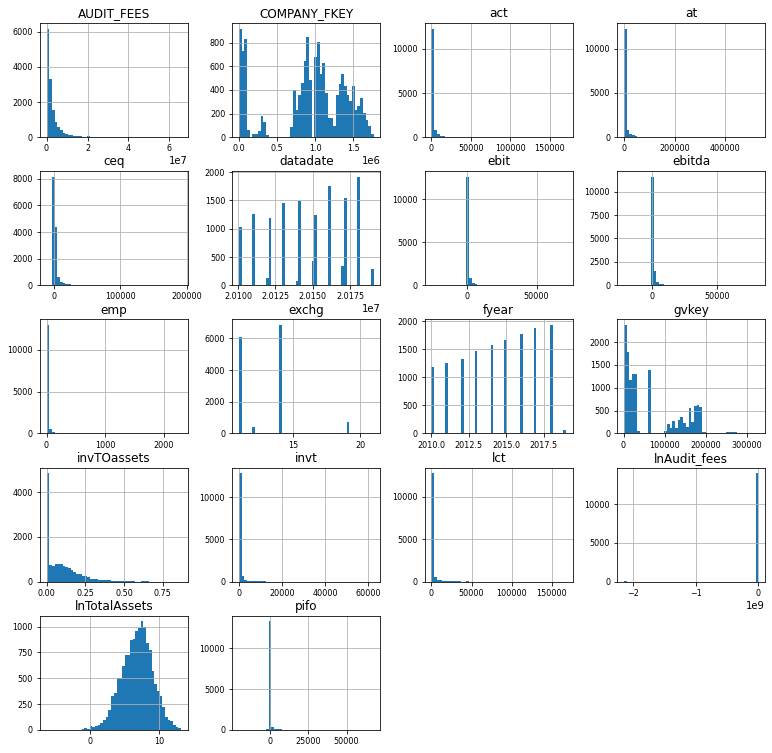

In [9]:
df_num.hist(figsize=(13, 13), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

**Observations:** act, at, ceq, ebit, ebitda, emp, invt, lct, pifo all show matching trends with audit fees. Inventory-assets (invTOassets) has a similar trend but not entirely. Natural log of total assets has a trend we cannot say much about with only visualizations.  

#### 5.2 We plot each of our numerical variable against Audit fees

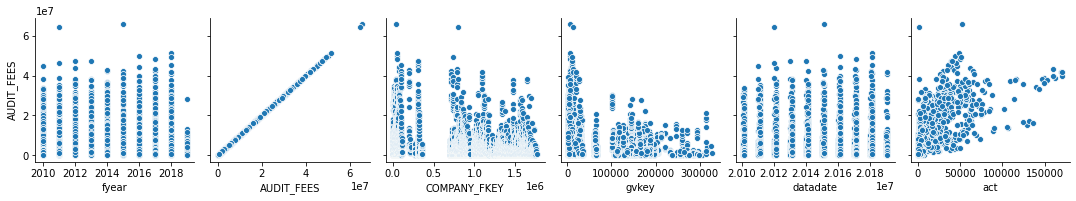

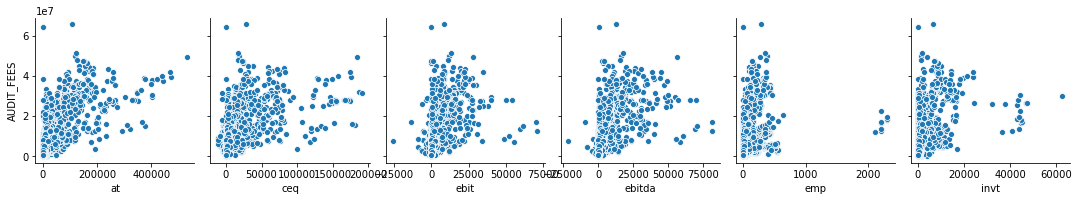

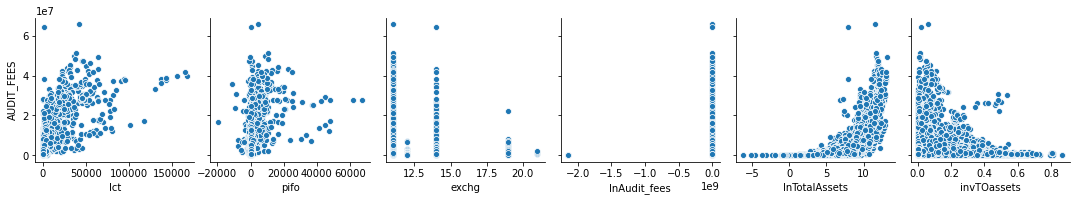

In [39]:
for i in range(0, len(df_num.columns), 6):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+6],
                y_vars=['AUDIT_FEES'])
plt.show()

**Observations:** The results and inferences remain the same as from 5.1 But we do notice the **extreme values.**

#### 5.3 Correlation of numerical variables with Audit fees
We calculate 2 lists of correlations here. The first one is of all numerical variables with Audit fees, and then we select the Important features list by filtering for those variables that have a correlation coefficient of greater than 0.5 with audit fees. 

In [30]:
df_num_corr = df_num.corr()['AUDIT_FEES'][5:] 
print(df_num_corr)

act              0.713024
at               0.734401
ceq              0.632178
ebit             0.587298
ebitda           0.644923
emp              0.414441
invt             0.535600
lct              0.696002
pifo             0.458827
exchg           -0.298319
lnAudit_fees     0.044595
lnTotalAssets    0.645162
invTOassets     -0.058701
Name: AUDIT_FEES, dtype: float64


#### Important features list

In [26]:
imp_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(imp_features)

at               0.734401
act              0.713024
lct              0.696002
lnTotalAssets    0.645162
ebitda           0.644923
ceq              0.632178
ebit             0.587298
invt             0.535600
Name: AUDIT_FEES, dtype: float64


**Observations:** Number of employees, pifo, invTOassets, exchg all got dropped by our correlation threshold filter. 
#### Plot of Important features against audit fees including a best fit for better visualization. 

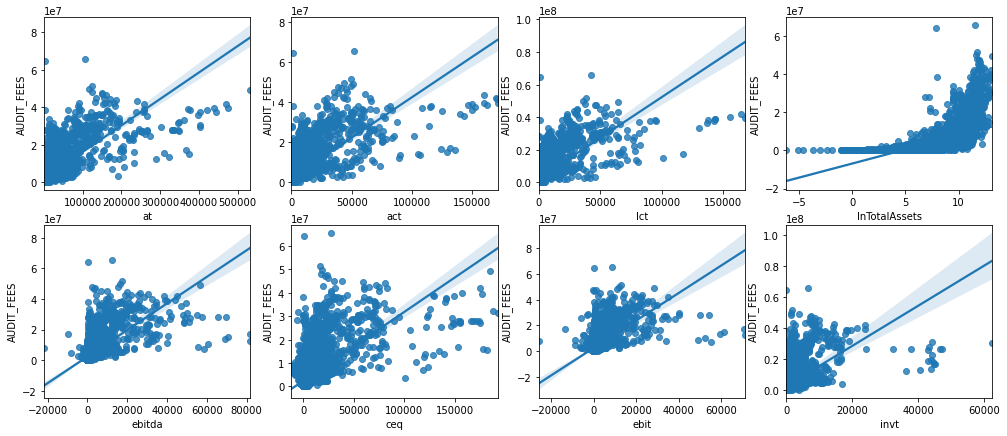

In [37]:
feature_list = imp_features.index.tolist()
feature_list.append('AUDIT_FEES')
fig, ax = plt.subplots(round(len(feature_list) / 4), 4, figsize = (17, 7))
for i, ax in enumerate(fig.axes):
    if i < len(feature_list) - 1:
        sns.regplot(x=feature_list[i],y='AUDIT_FEES', data=df, ax=ax)
plt.show()

### 6. Regression iteration 1

At this point, having looked at several visualizations and having used a correlation threshold filter, we have an idea of what all variables would work. Let's give it a try with all the variable that appear suitable!

**Note:** We are not grouping the data, nor are we summarizing the data because the filtered/cleansed data is already way smaller than the original. We do not want to lose further detail by summarizing. Also, we want the regression model to treat each entry as a data point with an audit fee and a set of firm characteristics. 

In [14]:
result = sm.ols(formula="AUDIT_FEES ~ act + at + lnTotalAssets + ceq + ebit + ebitda + invt + lct + big4 + busy + loss + frgn", 
                data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AUDIT_FEES   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2511.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:32:59   Log-Likelihood:            -2.2940e+05
No. Observations:               14086   AIC:                         4.588e+05
Df Residuals:                   14073   BIC:                         4.589e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.91e+06   1.38e+05    -28.265      0.000   -4.18e+06   -3.64e+06
big4[T.1]     -2.108e+05   7.15e+04     -2.949      0.003   -3.51e+05   -7.07e+04
busy[T.1]      1.442e+05   5.42e+04      2.659      0.008    3.79e+04     2.5e+05
loss[T.1]      6.073e+05   7.32e+04      8.294      0.000    4.64e+05    7.51e+05
frgn[T.1]      1.632e+05   1.05e+05      1.559      0.119    -4.2e+04    3.68e+05
act             179.6713      8.336     21.554      0.000     163.332     196.011
at              174.3903      5.617     31.049      0.000     163.381     185.400
lnTotalAssets  8.731e+05   1.75e+04     49.876      0.000    8.39e+05    9.07e+05
ceq            -142.6480      6.606    -21.592      0.000    -155.597    -129.699
ebit            317.7224     55.447      5.730      0.000     209.039     426.406
ebitda         -458.1280     55.787     -8.212      0.000    -567.478    -348.778
invt            225.3143     16.630     13.549      0.000     192.718     257.910
lct            -189.4892     13.393    -14.149      0.000    -215.741    -163.238
==============================================================================
Omnibus:                    11209.873   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           989600.317
Skew:                           3.227   Prob(JB):                         0.00
Kurtosis:                      43.552   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:** The R squared value is pretty decent at 68.1% but so far we have overlooked a key factor. Are all features significantly different from one another? Or are there more than one variable explaining the same thing. In statistics, this is the concept of **multicollinearity.** The condition number that often indicates multicollinearity has an exponent of 05. 
Also, FRGN has a p-value of greater than 0.05 so it is not significant. It will be removed in the next iteration. 

### 7. Reducing multicollinearity - finding correlations between *X* variables
We calculate the correlation matrix of all numerical variables. 

In [15]:
all_corr = df_num.corr()[5:]
all_corr.iloc[0:,5:]

,act,at,ceq,ebit,ebitda,emp,invt,lct,pifo,exchg,lnAudit_fees,lnTotalAssets,invTOassets
act,1.000000,0.875193,0.796587,0.763083,0.799738,0.434166,0.630802,0.922818,0.626988,-0.138366,0.018661,0.462102,-0.026492
at,0.875193,1.000000,0.920261,0.805610,0.900658,0.443730,0.595477,0.897145,0.657431,-0.159536,0.018671,0.484103,-0.074513
ceq,0.796587,0.920261,1.000000,0.787773,0.866983,0.363318,0.508068,0.756051,0.727408,-0.130597,0.016733,0.434978,-0.077698
ebit,0.763083,0.805610,0.787773,1.000000,0.970671,0.422528,0.465946,0.700632,0.838462,-0.126888,0.016694,0.417747,-0.056581
ebitda,0.799738,0.900658,0.866983,0.970671,1.000000,0.447749,0.510916,0.766405,0.808845,-0.140554,0.017757,0.449764,-0.067987
emp,0.434166,0.443730,0.363318,0.422528,0.447749,1.000000,0.650162,0.503171,0.208943,-0.136452,0.014943,0.320975,0.020271
invt,0.630802,0.595477,0.508068,0.465946,0.510916,0.650162,1.000000,0.702610,0.301170,-0.159200,0.015992,0.372616,0.158069
lct,0.922818,0.897145,0.756051,0.700632,0.766405,0.503171,0.702610,1.000000,0.552328,-0.141239,0.016353,0.429224,-0.021240
pifo,0.626988,0.657431,0.727408,0.838462,0.808845,0.208943,0.301170,0.552328,1.000000,-0.076953,0.010901,0.294261,-0.058930
exchg,-0.138366,-0.159536,-0.130597,-0.126888,-0.140554,-0.136452,-0.159200,-0.141239,-0.076953,1.000000,-0.028805,-0.516360,-0.031318


**Observations:** Using the above table and the correlation coefficients with audit fees in part 5.3, we make the following key observations:
<ul>
    <li>We know 'at', 'act', and 'lnTotalAssets' are about the similar characteristic. 'act' and 'at' are strongly correlated with each other. If we pick 'at' as it has stronger correlation with fees, we notice that 'at' has stronger correlation with most of our X variables. So picking it does not seem viable. </li>
    <li>Following from point 1, we notice that lnTotalAssets is from 'at', has slightly less correlation with fees, but has quite low correlation with other variables. So we decide to take a small hit in one variable but with the ability to add in more variables. We pick lnTotalAssets and drop 'at' and 'act'. </li>
    <li>Variables related to earnings 'ebit' and 'ebitda' were highly correlated. We picked 'ebitda' for its higher correlation with fees. </li>
    <li>Common Equity (CEQ) = Assets - Liabilities as per the basic accounting equation. So it moves with assets. It will always have high correlation with assets and earnings as they both form parts of the accounting equation. So we drop this variable too with the understanding that the variabilty in fees it explains is already being explained by other variables. </li>
</ul>

### 8. Regression iteration 2 - based on findings of part 7. 

In [28]:
result2 = sm.ols(formula="AUDIT_FEES ~ lnTotalAssets + ebitda + lct + invt + big4 + busy + loss", data=df).fit()
result2.summary()
# ceq leads to +0.1% r-squared but alot of condition number

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AUDIT_FEES   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3668.
Date:                Sat, 24 Oct 2020   Prob (F-statistic):               0.00
Time:                        05:45:50   Log-Likelihood:            -2.3015e+05
No. Observations:               14086   AIC:                         4.603e+05
Df Residuals:                   14078   BIC:                         4.604e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.643e+06   1.16e+05    -40.040      0.000   -4.87e+06   -4.42e+06
big4[T.1]     -3.953e+05    7.5e+04     -5.268      0.000   -5.42e+05   -2.48e+05
busy[T.1]      2.271e+05    5.7e+04      3.988      0.000    1.15e+05    3.39e+05
loss[T.1]      8.477e+05   7.69e+04     11.024      0.000    6.97e+05    9.98e+05
lnTotalAssets  1.038e+06   1.78e+04     58.417      0.000       1e+06    1.07e+06
ebitda          201.8644     10.841     18.621      0.000     180.615     223.114
lct             264.5035      6.820     38.781      0.000     251.135     277.872
invt            105.9771     17.222      6.154      0.000      72.220     139.734
==============================================================================
Omnibus:                     9960.521   Durbin-Watson:                   0.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           938154.888
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      42.632   Cond. No.                     4.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:** Although our R squared value went down to 64.6%, we know we have avoided many variables causing multicollinearity. Exponent of Condition number has gone down to 04. It is still high but that can also be due to varying range of X variables. This is our final model. p-value of regression is 0.00 meaning it is significant. All features have coefficients that are significant (p-value<0.05). Condition number has dropped further. R squared has remained decent at 64.6%.

## D. Conclusions

From the procedures conducted, we can conclude that EDA and visualizations allow us a quick and often accurate insights into what variables can be good features. Just by looking at the plots, we can identify which variables have plots similar to our response variables and we can shortlist the variables. 

The numerical analysis is a key step in the process through which we identify which variables are highly correlated with our variable of interest and which variables are related with each other. Using this data, we can make the decisions such that those variables are kept in the model that have high correlation with Y but minimum correlation with other variables. In many cases, it becomes a matter of judgement to see which variables add more value to the model. 

We also conclude that which variables and/or scaling methods work depend on the data. Although most research papers proposed using Natural log of audit fee as Y, in our case, an attempt with that gave an Rsquared value of 0.3% which is extremely low. Similarly, some indicator variables we created based on research added value, some did not. 

In our example, after observing several variable combinations, we picked 7 that added value to the model while minimizing multicollinearity. 

As an extension, other factors mentioned in texts can be obtained and regressed again. 

## E. References

Donohoe, M. P., &amp; Knechel, W. R. (2013). Does Corporate Tax Aggressiveness Influence Audit Pricing? Contemporary Accounting Research, 31(1), 284-308.

Hay, D., Knechel, W. R., &amp; Wong, N. (2004). Audit Fees: A Meta-Analysis of the Effect of Supply and Demand Attributes. SSRN Electronic Journal. doi:10.2139/ssrn.512642 
    
Other links:
https://deepblue.lib.umich.edu/bitstream/handle/2027.42/35865/b1408148.0001.001.pdf?sequence=2

https://www.wikihow.com/Calculate-Shareholders%27-Equity

https://www.investopedia.com/terms/e/ebitda.asp#:~:text=EBITDA%20is%20essentially%20net%20income,of%20financing%20and%20capital%20expenditures.

https://search.proquest.com/docview/216733727?pq-origsite=gscholar&fromopenview=true